In [3]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
# install plotly thru conda if jupyter cannot locate the module thru pip
import plotly.express as px
import plotly.graph_objects as go #object properties (figure)
#import chart_studio.plotly as py
from ipywidgets import interact

In [ ]:
applemobtrends_df = pd.read_csv('applemobilitytrends-2020-07-14.csv', low_memory=False)
googlemobtrends_df = pd.read_csv('Global_Mobility_Report.csv', low_memory=False)
confirmed_global_df = pd.read_csv('time_series_covid19_confirmed_global.csv', low_memory=False)
   
# renaming the df column names to lowercase
applemobtrends_df.columns = map(str.lower, applemobtrends_df.columns)
googlemobtrends_df.columns = map(str.lower, googlemobtrends_df.columns)
confirmed_global_df.columns = map(str.lower, confirmed_global_df.columns)

# changing province/state to state and country/region to country
googlemobtrends_df = googlemobtrends_df.rename(columns={'country_region': 'country'})
confirmed_global_df = confirmed_global_df.rename(columns={'country/region': 'country'})

confirmed_global_df2 = pd.DataFrame(confirmed_global_df.groupby('country').sum().iloc[:,1:].sum(axis=1)).reset_index()
confirmed_global_df3 = pd.merge(confirmed_global_df,confirmed_global_df2,on='country').set_index(confirmed_global_df.index)

print(confirmed_global_df3)

# filtering
def goog_retail_and_recreation_percent_change(country):
    country = str(country)
    return googlemobtrends_df[googlemobtrends_df['country'].str.contains(country)].sort_values(by=['date', 'retail_and_recreation_percent_change_from_baseline'])

def apple_mobility_trends(country):
    country = str(country)
    return applemobtrends_df[applemobtrends_df['region'].str.contains(country, na=False)].sort_values(by=['transportation_type'])




interact(goog_retail_and_recreation_percent_change, country='Colombia')
interact(apple_mobility_trends, country='Bulgaria')

In [13]:
df_transposed.iloc[:, 3:]

,3,4,5,6,7,8
metric,retail_and_recreation_percent_change_from_base...,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1/13/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/14/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/15/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/16/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/17/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/18/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/19/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/20/2020,NaN,NaN,NaN,NaN,NaN,NaN
1/21/2020,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

integrated_df = pd.read_csv('../../data/raw/split_countries/United States.csv', low_memory=False)


df_transposed = integrated_df.T
df_transposed = df_transposed.drop(df_transposed.index[[0]])

def shift_by(val):
    val = val + 100
    return val

df_transposed.drop(df_transposed.index[0], inplace=True)

df_transposed.iloc[1:, 3:] = df_transposed.iloc[1:, 3:].apply(shift_by)


#MODELING

df_transposed.columns = df_transposed.iloc[0]
df_transposed.drop(df_transposed.index[0], inplace=True)


df_transposed = df_transposed[['confirmed_cases', 'workplaces_percent_change_from_baseline', 
                               'residential_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']]


df_transposed = df_transposed.apply(pd.to_numeric)

limit = int(len(df_transposed.index))


#1st layer of differencing cumulative covid cases twice
df_transposed.iloc[1:, 0] = df_transposed.iloc[:, 0].diff()[1:]#.dropna(inplace=True)

#df_transposed = df_transposed.iloc[0, :].drop(df_transposed.index[0])

df_transposed = df_transposed[df_transposed['confirmed_cases'] != 0]

#rolling mean in pandas

#2nd layer of differencing 
data = np.log(df_transposed.iloc[:limit,:]).diff().dropna()

model = VAR(data)

ZZ=15
results = model.fit(maxlags=ZZ)

results.summary()

C:\Users\nasko\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Nov, 2020
Time:                     01:33:31
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.6795
Nobs:                     128.000    HQIC:                  -19.9072
Log likelihood:           932.938    FPE:                3.47433e-10
AIC:                     -22.1162    Det(Omega_mle):     7.30910e-11
--------------------------------------------------------------------
Results for equation confirmed_cases
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.011411         0.031407           -0.363           0.716
L1.confirmed_cases     

In [6]:
df_transposed = df_transposed[df_transposed['confirmed_cases'] != 0]

df_transposed = df_transposed[['confirmed_cases', 'workplaces_percent_change_from_baseline', 
                               'residential_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']]


limit = int(len(df_transposed.index))

#1st layer of differencing cumulative covid cases twice
#covid_dbl_diff = df_transposed.iloc[:, 0].diff().dropna(inplace=True)
#df_transposed.iloc[:, 0] = covid_dbl_diff

#df_transposed = df_transposed.iloc[0, :].drop(df_transposed.index[0])

#2nd layer of differencing 
data = np.log(df_transposed.iloc[:limit,:]).diff().dropna()

model = VAR(data)

ZZ=15
results = model.fit(maxlags=ZZ)

results.summary()

C:\Users\nasko\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Nov, 2020
Time:                     08:26:33
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.6795
Nobs:                     128.000    HQIC:                  -19.9072
Log likelihood:           932.938    FPE:                3.47433e-10
AIC:                     -22.1162    Det(Omega_mle):     7.30910e-11
--------------------------------------------------------------------
Results for equation confirmed_cases
                                                       coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------------
const                                                    -0.011411         0.031407           -0.363           0.716
L1.confirmed_cases     

In [7]:
covid_dbl_diff = df_transposed.iloc[:limit, 0].diff().dropna(inplace=True)
#df_transposed.iloc[:, 0] = covid_dbl_diff
covid_dbl_diff

In [8]:
results = model.fit(maxlags=25, ic='aic')
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

array([[ 0.1655658 , -0.10601711,  0.06994089, -0.21626929],
       [ 0.14483098, -0.02544056, -0.03843839,  0.18441322],
       [-0.12302603,  0.01956497,  0.00811119, -0.10256641],
       [ 0.0659472 ,  0.03257178, -0.01010809,  0.06727515],
       [ 0.01172093, -0.23312092,  0.06340724, -0.13689075]])

In [10]:
model.select_order(15)

In [11]:
lag_order

25

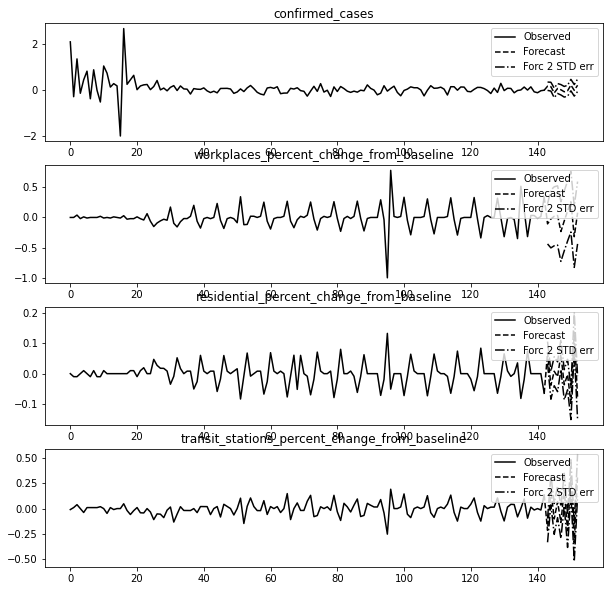

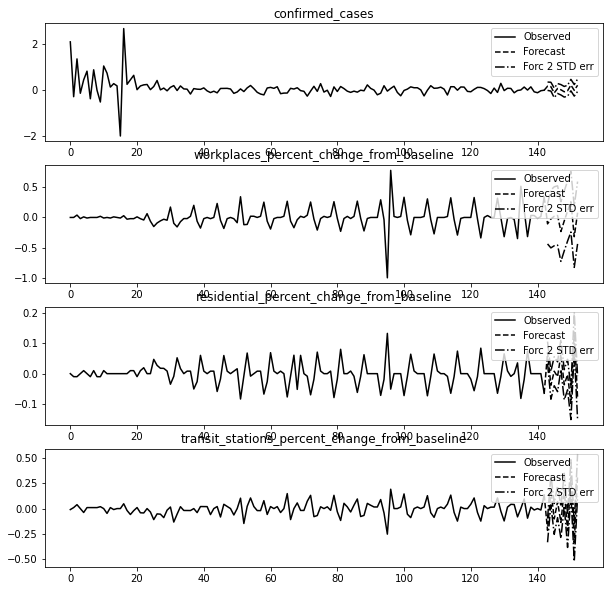

In [12]:
results.plot_forecast(10)

In [187]:
df_transposed.head()
df_transposed[df_transposed['walking'] == 0]

metric,confirmed_cases,driving,walking


In [188]:
df_transposed.iloc[:30,:]

metric,confirmed_cases,driving,walking
2/23/2020,1,108.21,100.5
2/24/2020,1,107.92,96.6
2/25/2020,1,99.51,82.59
2/26/2020,2,96.38,107.79
2/27/2020,8,97.96,110.62
2/28/2020,12,116.77,124.18
2/29/2020,12,117.72,108.49
3/1/2020,17,81.13,68.5
3/2/2020,19,86.76,101.01
3/3/2020,19,88.9,104.39
